In [14]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import datetime
import re
import numpy as np

%matplotlib notebook

from IPython.display import display, HTML

In [5]:

one_drive_folder = "../Incident Prediction"


pd_data_input = "/pagerduty_Incident_data/incidents/"
pd_data_output ="/pagerduty_Incident_data/generated/"

input_directory = one_drive_folder + pd_data_input
output_directory = one_drive_folder + pd_data_output


In [4]:
incidents = pd.DataFrame(columns=['id', 'incident_number', 'description', 'service_id', 'service_name',
                           'escalation_policy_id','escalation_policy_name','created_on', 'resolved_on'
                           'seconds_to_first_ack','seconds_to_resolve', 'auto_resolved', 
                           'escalation_count', 'auto_escalation_count', 'acknowledge_count',
                           'assignment_count', 'acknowledged_by_user_ids','acknowledged_by_user_names', 
                           'assigned_to_user_ids','resolved_by_user_id','urgency'])

#pre-processing of Pagerduty incides data starts here
#loading the Pagerduty incidents data
for root,dirs,files in os.walk(input_directory):
    for file in files:
        temp = pd.read_csv(input_directory + file)
        incidents = incidents.append(temp)
incidents.to_csv(output_directory + "all_2017_2019.csv")


/Users/a071887/pdip/venv/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [5]:
# comnine PD data
all = pd.read_csv(output_directory + "all_2017_2019.csv")
compact = all[['incident_number','created_on','resolved_on','service_name','description','seconds_to_resolve','urgency']].copy()
compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in compact['created_on']]
compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in compact['created_on']]
compact['created_datetime'] = [pd.to_datetime(d,utc=True) for d in compact['created_on']]
compact_datetime = compact

In [7]:
#cleanup PD data
temp1 = compact_datetime[~compact_datetime.service_name.str.contains("BCOM")]
temp2 = temp1[~temp1.service_name.str.contains("STARS")]
temp3 = temp2[~temp2.service_name.str.contains("DaaS")]
temp4 = temp3[~temp3.service_name.str.contains("EDPOC")]
temp5 = temp4[~temp4.service_name.str.contains("TEST")]
temp6 = temp5[~temp5.service_name.str.contains("perf tasks")]
temp7 = temp6[~temp6.service_name.str.contains("escalation")]
temp8 = temp7[~temp7.service_name.str.contains("prometheus")]
temp9 = temp8[~temp8.service_name.str.contains("stella")]
temp10 = temp9[~temp9.service_name.str.contains("Stackdriver")]
temp11 = temp10[~temp10.service_name.str.contains("Test")]
temp12 = temp11[~temp11.service_name.str.contains("EMLP")]
temp13 = temp12[~temp12.service_name.str.contains("testing")]
temp14 = temp13[~temp13.service_name.str.contains("Demo")]
temp15 = temp14[~temp14.service_name.str.contains("Default")]
temp16 = temp15[~temp15.service_name.str.contains("Escalation")]
temp17 = temp16[~temp16.service_name.str.contains("Escalations")]
temp18 = temp17[~temp17.service_name.str.contains("Perf")]
#temp18
temp18['description'] = [re.sub('(\d\d\d\d?)\-(\d\d??)\-(\d\d)','DATE', str(d)) for d in temp18['description']]
temp18['description'] = [re.sub('(\d\d*)\/(\d\d??)\/(\d\d)','DATE',d) for d in temp18['description']]
temp18['description'] = [re.sub('(\d\d?)\:(\d\d?)','TIME',d) for d in temp18['description']]
temp18['description'] = [re.sub('(http:\/\/[A-Za-z0-9.\/-]*)','URL',d) for d in temp18['description']]
temp18['description'] = [re.sub('(https:\/\/[A-Za-z0-9.\/-]*)','URL',d) for d in temp18['description']]
temp18['description'] = [re.sub('( ma[0-9]*[a-z0-9]*)','HOSTNAME',d) for d in temp18['description']]
temp18['description'] = [re.sub('(@ma[0-9]*[a-z0-9]*)','HOSTNAME',d) for d in temp18['description']]
temp18['description'] = [re.sub('(\'ma[0-9]*[a-z0-9]*)','HOSTNAME',d) for d in temp18['description']]
temp18['description'] = [re.sub('([^0-9a-zA-Z]+)','',d) for d in temp18['description']]
temp18['description'] = [re.sub('([0-9]+)','NUMBER',d) for d in temp18['description']]
filtered_incidents = temp18
filtered_pd_incidents = filtered_incidents
#servicenames = filtered_pd_incidents.service_name.unique()
#descriptions = filtered_pd_incidents.description.unique()
#len(descriptions)
filtered_incidents.to_csv(output_directory + "all_2017_2019_unique.csv")


/Users/a071887/pdip/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a071887/pdip/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/a071887/pdip/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [8]:
#Loading JIRA tickets data
jira_data_input = "/JIRA/"
input_directory = one_drive_folder + jira_data_input 
all_jira = pd.read_csv(input_directory + "JIRA_2017_2019.csv")
all_jira.set_index('Created')

#pre-process JIRA data
sev_compact = all_jira[['Created','Summary','Description','Custom field (Brand)','Custom field (Channel)','Custom field (Component)', 'Issue key', 'Custom field (Incident Start Date)', 'Custom field (Incident End Date)']].copy()
sev_compact['jira_ticket'] = sev_compact['Issue key'].astype(str)
del sev_compact['Issue key']
sev_compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in sev_compact['Created']]
sev_compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in sev_compact['Created']]
sev_compact['created_datetime'] = [pd.to_datetime(d,utc=True) for d in sev_compact['Created']]
sev_compact['service_name'] = ['jira_sev1_issue' for d in sev_compact['Created']]
sev_compact['description'] = [sev_compact['Description'] for d in sev_compact['Description']]
sev_compact.set_index('created_date')
sev_compact['Custom field (Incident Start Date)'].fillna(sev_compact['created_datetime'],inplace=True)
sev_compact['incident_start_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in sev_compact['Custom field (Incident Start Date)']]
sev_compact['incident_start_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in sev_compact['Custom field (Incident Start Date)']]
sev_compact['incident_start_datetime'] = [pd.to_datetime(d,utc=True) for d in sev_compact['Custom field (Incident Start Date)']]
sev_compact['Custom field (Incident End Date)'].fillna(sev_compact['incident_start_datetime'] + pd.DateOffset(hours=1),inplace=True)
sev_compact['incident_end_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in sev_compact['Custom field (Incident End Date)']]
sev_compact['incident_end_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in sev_compact['Custom field (Incident End Date)']]
sev_compact['incident_end_datetime'] = [pd.to_datetime(d,utc=True) for d in sev_compact['Custom field (Incident End Date)']]
sev_compact_datetime = sev_compact
tempj1 = sev_compact_datetime['Custom field (Component)'].str.contains("MSP-Order")
tempj2 = tempj1.fillna(False)
tempj3 = sev_compact_datetime[~tempj2]
order_to_batch_jira = tempj3[~tempj3['Summary'].str.contains("Orders To Batch")]
order_to_batch_jira_sab = order_to_batch_jira
jira_otb = order_to_batch_jira
del jira_otb['description']
del jira_otb['Description']
del sev_compact_datetime['description']
del sev_compact_datetime['Description']
sev_compact_datetime.to_csv(output_directory + "jira_otb_2017_2019.csv")
sev_compact_datetime


,Created,Summary,Custom field (Brand),Custom field (Channel),Custom field (Component),Custom field (Incident Start Date),Custom field (Incident End Date),jira_ticket,created_date,created_time,created_datetime,service_name,incident_start_date,incident_start_time,incident_start_datetime,incident_end_date,incident_end_time,incident_end_datetime
0,05/30/2018 12:44 PM,Order Drop on MCOM RTP - 05/30,MCOM,Desktop,Akamai -> Akamai - Other,05/30/2018 01:56 AM,05/30/2018 01:57 PM,DS-107437,2018-05-30,12:44:00,2018-05-30 12:44:00+00:00,jira_sev1_issue,2018-05-30,01:56:00,2018-05-30 01:56:00+00:00,2018-05-30,13:57:00,2018-05-30 13:57:00+00:00
1,05/17/2018 06:29 AM,Order Drop at 5:30 PM EST MCOM DAL (FCC),MCOM and BCOM,Desktop,Android -> Android,1526538540000000000,1526542140000000000,DS-106241,2018-05-17,06:29:00,2018-05-17 06:29:00+00:00,jira_sev1_issue,2018-05-17,06:29:00,2018-05-17 06:29:00+00:00,2018-05-17,07:29:00,2018-05-17 07:29:00+00:00
2,10/23/2019 07:58 PM,Order Drop in MCOM/BCOM - WDC 10/23 06.36 PM ...,MCOM and BCOM,Desktop,Akamai,10/16/2019 06:36 PM,1571254560000000000,DS-847889,2019-10-23,19:58:00,2019-10-23 19:58:00+00:00,jira_sev1_issue,2019-10-16,18:36:00,2019-10-16 18:36:00+00:00,2019-10-16,19:36:00,2019-10-16 19:36:00+00:00
3,10/11/2018 02:30 PM,Order Dip on MCOM - 10/11 03:33 PM ET to 10/11...,MCOM,Desktop,Akamai,10/11/2018 03:33 PM,10/11/2018 03:56 PM,DS-119039,2018-10-11,14:30:00,2018-10-11 14:30:00+00:00,jira_sev1_issue,2018-10-11,15:33:00,2018-10-11 15:33:00+00:00,2018-10-11,15:56:00,2018-10-11 15:56:00+00:00
4,08/12/2019 01:39 PM,12/08 - MCOM (Brand) Health Status: Critical @...,MCOM,Desktop,Akamai,08/12/2019 01:39 PM,1565620740000000000,DS-766017,2019-08-12,13:39:00,2019-08-12 13:39:00+00:00,jira_sev1_issue,2019-08-12,13:39:00,2019-08-12 13:39:00+00:00,2019-08-12,14:39:00,2019-08-12 14:39:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,09/26/2018 12:44 PM,MCOM Order Drop due to JDBC connections spike,MCOM,Desktop,WSSG -> WSSG - Other,1537965840000000000,1537969440000000000,DS-117748,2018-09-26,12:44:00,2018-09-26 12:44:00+00:00,jira_sev1_issue,2018-09-26,12:44:00,2018-09-26 12:44:00+00:00,2018-09-26,13:44:00,2018-09-26 13:44:00+00:00
232,05/15/2018 09:18 AM,05/14 - order drop incident wrt /device API c...,MCOM,MobileMew,NaN,1526375880000000000,1526379480000000000,DS-106011,2018-05-15,09:18:00,2018-05-15 09:18:00+00:00,jira_sev1_issue,2018-05-15,09:18:00,2018-05-15 09:18:00+00:00,2018-05-15,10:18:00,2018-05-15 10:18:00+00:00
233,05/29/2018 03:47 PM,Experiencing soft sales on tablets,MCOM,Tablet,NaN,1527608820000000000,1527612420000000000,DS-107311,2018-05-29,15:47:00,2018-05-29 15:47:00+00:00,jira_sev1_issue,2018-05-29,15:47:00,2018-05-29 15:47:00+00:00,2018-05-29,16:47:00,2018-05-29 16:47:00+00:00
234,06/11/2018 06:53 PM,MCOM Order Dip @08.07 PM ET,MCOM,Desktop,NaN,06/11/2018 06:11 AM,06/11/2018 06:11 AM,DS-108457,2018-06-11,18:53:00,2018-06-11 18:53:00+00:00,jira_sev1_issue,2018-06-11,06:11:00,2018-06-11 06:11:00+00:00,2018-06-11,06:11:00,2018-06-11 06:11:00+00:00


In [9]:
import pandas as pd
all_compact = pd.read_csv(output_directory + "all_2017_2019_unique.csv")
jira_otb = pd.read_csv(output_directory + "jira_otb_2017_2019.csv")

def prepare_jira_vs_incidents(jira_issues, pd_incidents, relative_time_window):
    import pandasql as ps
    import numpy as np
    
    sqlcode = '''
    select  pd_incidents.incident_number pd_incident_number,
            pd_incidents.service_name pd_service_name, 
            pd_incidents.description pd_description,
            pd_incidents.created_datetime pd_created_datetime,
            jira_issues.created_datetime jira_created_datetime,
            jira_issues.service_name jira_service_name,
            jira_issues.jira_ticket jira_ticket,
            jira_issues.incident_start_datetime,
            jira_issues.incident_end_datetime
    from jira_issues
    left outer join pd_incidents on pd_incidents.created_datetime >= jira_issues.incident_start_datetime 
    and pd_incidents.created_datetime <= jira_issues.incident_end_datetime
    '''
    combined = ps.sqldf(sqlcode,locals())
    combined = combined.mask(combined.eq('None')).dropna()
    combined['pd_created_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['pd_created_datetime']]
    combined['jira_created_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['jira_created_datetime']]
    combined['incident_start_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['incident_start_datetime']]
    combined['incident_end_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['incident_end_datetime']]
    combined['issue_happened'] = '1'
    return combined
    
# call the function by passing pre-processed dataframes
combined = prepare_jira_vs_incidents(sev_compact_datetime,filtered_incidents, 1)
combined.to_csv(output_directory + "combined_2017_2019.csv")

/Users/a071887/pdip/venv/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [10]:
import pandasql as ps
import numpy as np
combined_1 = combined.set_index('pd_incident_number')
incidents_1 = filtered_incidents.set_index('incident_number')

sqlcode = '''
    select  incidents_1.incident_number incident_number,
            incidents_1.description description,
            incidents_1.created_datetime created_datetime,
            combined_1.issue_happened issue_happened,
            combined_1.jira_created_datetime jira_created_datetime,
            combined_1.jira_ticket jira_ticket,
            combined_1.incident_start_datetime,
            combined_1.incident_end_datetime
    from incidents_1
    left outer join combined_1 on incidents_1.incident_number = combined_1.pd_incident_number 
    '''
labeled_incidents = ps.sqldf(sqlcode,locals())
labeled_incidents = labeled_incidents.fillna(0).sort_values(by=['created_datetime'])
labeled_incidents.to_csv(output_directory + "labelled_incidents_2017_2019.csv")
#labeled_incidents.groupby(['jira_ticket']).count()['description']
train_set = labeled_incidents.head(400000)
test_temp = labeled_incidents.tail(200000)
#dev_set = labeled_incidents.tail(500)
dev_set = test_temp[test_temp.jira_ticket == 'DS-887937']
test_set = test_temp[test_temp.jira_ticket != 'DS-887937']
train_set.to_csv(output_directory + "train_set_2017_2019.csv")
test_set.to_csv(output_directory + "test_set_2017_2019.csv")
dev_set.to_csv(output_directory + "dev_set_2017_2019.csv")
#train_set
#test_set
dev_set

,incident_number,description,created_datetime,issue_happened,jira_created_datetime,jira_ticket,incident_start_datetime,incident_end_datetime
637874,1650227,FIRINGNUMBERKubeDeploymentReplicasMismatchcrit...,2019-11-27 22:28:34.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637875,1650228,SplunkAlertSEVNUMBERECOMWDCShopAppRedirectingt...,2019-11-27 22:29:36.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637876,1650230,SplunkAlertSEVNUMBERMCOMWDCSNBAllOriginNUMBERX...,2019-11-27 22:31:21.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637877,1650231,SplunkAlertSEVNUMBERALLWDCALLMSPCustomerDuplic...,2019-11-27 22:31:36.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637878,1650233,FIRINGNUMBERKubePodCrashLoopingcriticalorderde...,2019-11-27 22:37:49.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637879,1650237,SplunkAlertSEVNUMBERECOMWDCShopAppRedirectingt...,2019-11-27 22:44:37.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637880,1650242,AlertSEVNUMBERUnifiedLoginOOPSAlert,2019-11-27 22:59:14.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637881,1650243,SplunkAlertSEVNUMBERMCOMDALSNBAllOriginSOCKETT...,2019-11-27 22:59:29.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637882,1650244,SplunkAlertSEVNUMBERAllWDCHUBAllOriginNUMBERXX...,2019-11-27 22:59:48.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000
637883,1650245,SplunkAlertSevNUMBERMCOMWDCDESKTOPORDEROrderTo...,2019-11-27 23:00:55.000000,1,2019-11-27 10:15:00.000000,DS-887937,2019-11-27 22:15:00.000000,2019-11-27 23:15:00.000000


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf

In [11]:
train_set = pd.read_csv(output_directory + "train_set_2017_2019.csv")
test_set = pd.read_csv(output_directory + "test_set_2017_2019.csv")
dev_set = pd.read_csv(output_directory + "dev_set_2017_2019.csv")
train_X = train_set['description'].values
train_y = train_set['issue_happened'].values
test_X = test_set['description'].values
test_y = test_set['issue_happened'].values
dev_X = dev_set['description'].values
dev_y = dev_set['issue_happened'].values
#descriptions = all_compact.description.unique()
#len(descriptions)
#descriptions = all_compact.groupby(['description']).count()['incident_number']
#descriptions.to_csv(output_directory + "unique_incidents_2017_2019.csv")
#train_X
#test_X
#dev_X

/Users/a071887/pdip/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['FIRINGNUMBERKubeDeploymentReplicasMismatchcriticalorderdetailshttpmtechorderplatformperfuseastNUMBERorderperfeNUMBERperfNUMBERTIMENUMBERkubestatemetricsperfprometheusoperatorkubestatemetricsNUMBERdNUMBERbdNUMBERfkgxzwmonitoringprometheusoperatorp',
       'SplunkAlertSEVNUMBERECOMWDCShopAppRedirectingtoshoppingbagfromcheckout',
       'SplunkAlertSEVNUMBERMCOMWDCSNBAllOriginNUMBERXXErrors',
       'SplunkAlertSEVNUMBERALLWDCALLMSPCustomerDuplicateKeyExceptionforUserSoftwalletTable',
       'FIRINGNUMBERKubePodCrashLoopingcriticalorderdetailshttpmtechorderplatformperfuseastNUMBERorderperfeNUMBERperfNUMBERTIMENUMBERkubestatemetricsperfmonitoringprometheusoperatorprometheusprometheusoperatorkubestatemetrics',
       'SplunkAlertSEVNUMBERECOMWDCShopAppRedirectingtoshoppingbagfromcheckout',
       'AlertSEVNUMBERUnifiedLoginOOPSAlert',
       'SplunkAlertSEVNUMBERMCOMDALSNBAllOriginSOCKETTIMEOUTEXCEPTION',
       'SplunkAlertSEVNUMBERAllWDCHUBAllOriginNUMBERXXErrors',
       'Splunk

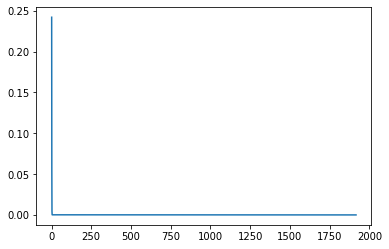

In [75]:
temp = pd.read_csv(output_directory + "unique_incidents_2017_2019.csv", names=['destription','count'])
x = temp['count']
#x = np.linspace(-5, 5, 5000)

mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))
plt.plot(x, y);


In [15]:
vocab_size = 20000
train_encoded_docs = [tf.keras.preprocessing.text.one_hot(str(d), vocab_size) for d in train_X]
test_encoded_docs = [tf.keras.preprocessing.text.one_hot(d, vocab_size) for d in test_X]
dev_encoded_docs = [tf.keras.preprocessing.text.one_hot(d, vocab_size) for d in dev_X]
train_labels = np.asarray(train_y, dtype=np.uint8)
test_labels = np.asarray(test_y, dtype=np.uint8)
dev_labels = np.asarray(dev_y, dtype=np.uint8)
#train_labels
#test_labels
#train_encoded_docs
#test_encoded_docs
#print(encoded_docs)

In [16]:
# pad documents to a max length of 4 words
max_length = 1
train_padded_docs = tf.keras.preprocessing.sequence.pad_sequences(train_encoded_docs, maxlen=max_length, padding='post')
test_padded_docs = tf.keras.preprocessing.sequence.pad_sequences(test_encoded_docs, maxlen=max_length, padding='post')
dev_padded_docs = tf.keras.preprocessing.sequence.pad_sequences(dev_encoded_docs, maxlen=max_length, padding='post')
#train_padded_docs
#test_padded_docs

In [18]:
sequence_size = 100
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, sequence_size, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(sequence_size)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(sequence_size, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_padded_docs,train_labels, epochs=10, batch_size=10000)

Train on 400000 samples
Epoch 1/10
400000/400000 [==============================] - 13s 32us/sample - loss: 0.6905 - accuracy: 0.6006
Epoch 2/10
400000/400000 [==============================] - 9s 22us/sample - loss: 0.6789 - accuracy: 0.6384
Epoch 3/10
400000/400000 [==============================] - 9s 23us/sample - loss: 0.6460 - accuracy: 0.7127
Epoch 4/10
400000/400000 [==============================] - 9s 23us/sample - loss: 0.5678 - accuracy: 0.8405
Epoch 5/10
400000/400000 [==============================] - 9s 22us/sample - loss: 0.4559 - accuracy: 0.8751
Epoch 6/10
400000/400000 [==============================] - 9s 23us/sample - loss: 0.3625 - accuracy: 0.8849
Epoch 7/10
400000/400000 [==============================] - 9s 22us/sample - loss: 0.3145 - accuracy: 0.8883
Epoch 8/10
400000/400000 [==============================] - 9s 23us/sample - loss: 0.2940 - accuracy: 0.8898
Epoch 9/10
400000/400000 [==============================] - 9s 23us/sample - loss: 0.2841 - accuracy: 0

In [21]:
test_loss, test_acc = model.evaluate(test_padded_docs,test_labels)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Test Loss: 0.6164684450259368
Test Accuracy: 0.6944931745529175


In [22]:
dev_padded_docs
predictions = model.predict(dev_padded_docs)
for i in predictions:
    print(i)

[0.5492627]
[0.78326356]
[0.7014837]
[0.7319598]
[0.54389834]
[0.78326356]
[0.39033496]
[0.4630258]
[0.80753684]
[0.39040503]
[0.78326356]
